In [1]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('./data/cleaned_kc_house_data.csv')

In [3]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,4.0,0.0,2.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,4.0,0.0,2.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0,3.0,0.0,2.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910,4.0,0.0,4.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0,5.0,0.0,2.0


Will start with LR model including all columns except target. 

In [4]:
y = df['price']
X = df.drop('price', axis = 1)

In [5]:
multi_baseline = sm.OLS(y, sm.add_constant(X)).fit()
multi_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3028.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:25:20   Log-Likelihood:            -2.9465e+05
No. Observations:               21595   AIC:                         5.893e+05
Df Residuals:                   21578   BIC:                         5.895e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -3.21e+05   2.96e+06     -0.109      0.913   -6.11e+06    5.47e+06
bedrooms          -4.322e+04   2005.500    -21.549      0.000   -4.71e+04   -3.93e+04
bathrooms          4.452e+04   3311.511     13.444      0.000     3.8e+04     5.1e+04
sqft_living         116.4663      2.311     50.392      0.000     111.936     120.996
sqft_lot              0.1668      0.049      3.436      0.001       0.072       0.262
floors             9133.1382   3648.959      2.503      0.012    1980.910    1.63e+04
sqft_above           65.1491      2.274     28.653      0.000      60.692      69.606
yr_built          -2802.5140     72.660    -38.570      0.000   -2944.933   -2660.095
yr_renovated         25.9009      4.033      6.423      0.000      17.997      33.805
zipcode            -513.4746     33.309    -15.415      0.000    -578.763    -448.186
lat                 5.75e+05   1.08e+04     53.043      0.000    5.54e+05    5.96e+05
long              -2.328e+05   1.33e+04    -17.478      0.000   -2.59e+05   -2.07e+05
sqft_living15        35.4000      3.453     10.252      0.000      28.632      42.168
sqft_lot15           -0.3866      0.074     -5.200      0.000      -0.532      -0.241
sqft_basment_calc    51.3173      2.648     19.378      0.000      46.127      56.508
grades             1.007e+05   2184.683     46.093      0.000    9.64e+04    1.05e+05
waterfront         3.885e+05   8601.243     45.170      0.000    3.72e+05    4.05e+05
condition          2.753e+04   2378.156     11.576      0.000    2.29e+04    3.22e+04
==============================================================================
Omnibus:                    18073.324   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1680075.494
Skew:                           3.501   Prob(JB):                         0.00
Kurtosis:                      45.640   Cond. No.                     3.84e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Initial interpretations: 
- R2 value increased as expected. It increased from 49% in SLR baseline to 67%. 
- p-values are < 0.05 for all variables. 
- will need to examine issues of multicollinearity as Cond. No. is very large. 

## Exploring multicollinearity 

Found correlations for pairs of features that are higher than 0.75. 

In [6]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [7]:
#code from multicollinearity lab

df_multico = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_multico['pairs'] = list(zip(df_multico.level_0, df_multico.level_1))
df_multico.set_index(['pairs'], inplace = True)
df_multico.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_multico.columns = ['cc']
df_multico.drop_duplicates(inplace=True)
df_multico[(df_multico.cc>.75) & (df_multico.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876446
"(sqft_living, grades)",0.762825
"(sqft_living15, sqft_living)",0.756468
"(sqft_above, grades)",0.756103
"(sqft_living, bathrooms)",0.755742


Even though sq ft living is the highest correlated to price, it is highly correlated with several other variables. Will start by dropping sqft_above as it provides similar information as sqft_living and is less correlated with sale price.

In [8]:
X_dropped = df.drop(columns=['price', 'sqft_above'], axis = 1)

In [9]:
results_dropped = sm.OLS(y, sm.add_constant(X_dropped)).fit()
results_dropped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3028.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:25:20   Log-Likelihood:            -2.9465e+05
No. Observations:               21595   AIC:                         5.893e+05
Df Residuals:                   21578   BIC:                         5.895e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -3.21e+05   2.96e+06     -0.109      0.913   -6.11e+06    5.47e+06
bedrooms          -4.322e+04   2005.500    -21.549      0.000   -4.71e+04   -3.93e+04
bathrooms          4.452e+04   3311.511     13.444      0.000     3.8e+04     5.1e+04
sqft_living         181.6154      3.743     48.523      0.000     174.279     188.952
sqft_lot              0.1668      0.049      3.436      0.001       0.072       0.262
floors             9133.1382   3648.959      2.503      0.012    1980.910    1.63e+04
yr_built          -2802.5140     72.660    -38.570      0.000   -2944.933   -2660.095
yr_renovated         25.9009      4.033      6.423      0.000      17.997      33.805
zipcode            -513.4746     33.309    -15.415      0.000    -578.763    -448.186
lat                 5.75e+05   1.08e+04     53.043      0.000    5.54e+05    5.96e+05
long              -2.328e+05   1.33e+04    -17.478      0.000   -2.59e+05   -2.07e+05
sqft_living15        35.4000      3.453     10.252      0.000      28.632      42.168
sqft_lot15           -0.3866      0.074     -5.200      0.000      -0.532      -0.241
sqft_basment_calc   -13.8318      4.362     -3.171      0.002     -22.381      -5.283
grades             1.007e+05   2184.683     46.093      0.000    9.64e+04    1.05e+05
waterfront         3.885e+05   8601.243     45.170      0.000    3.72e+05    4.05e+05
condition          2.753e+04   2378.156     11.576      0.000    2.29e+04    3.22e+04
==============================================================================
Omnibus:                    18073.324   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1680075.494
Skew:                           3.501   Prob(JB):                         0.00
Kurtosis:                      45.640   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Reran model without sqft_above: 

- R2 value did not change and all coefficients are sigificant. 
- Cond. No dropped from 2.7 x 10^16 to 2.1 x 10^8. To determine if more features need to be dropped a VIF test will be conducted.

In [10]:
# code by Aniruddha Bhandari
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [11]:
calc_vif(X_dropped)

,variables,VIF
0,bedrooms,2.528938e+01
1,bathrooms,2.882890e+01
2,sqft_living,3.748285e+01
3,sqft_lot,2.373002e+00
4,floors,1.689011e+01
5,yr_built,9.242021e+03
6,yr_renovated,1.152747e+00
7,zipcode,1.635049e+06
8,lat,1.378615e+05
9,long,1.360704e+06


There are several very high scores, will start by dropping the highest "zipcode".

In [12]:
X_dropped_vif = df.drop(columns=['price', 'sqft_above', 'zipcode'], axis = 1)

In [13]:
results_dropped_vif = sm.OLS(y, sm.add_constant(X_dropped_vif)).fit()
results_dropped_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     3179.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:25:22   Log-Likelihood:            -2.9477e+05
No. Observations:               21595   AIC:                         5.896e+05
Df Residuals:                   21579   BIC:                         5.897e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.856e+07   1.61e+06    -23.883      0.000   -4.17e+07   -3.54e+07
bedrooms          -4.143e+04   2013.096    -20.580      0.000   -4.54e+04   -3.75e+04
bathrooms          4.538e+04   3329.147     13.631      0.000    3.89e+04    5.19e+04
sqft_living         180.0663      3.762     47.864      0.000     172.692     187.440
sqft_lot              0.1635      0.049      3.349      0.001       0.068       0.259
floors             3754.6146   3652.101      1.028      0.304   -3403.773    1.09e+04
yr_built          -2651.5810     72.391    -36.629      0.000   -2793.472   -2509.690
yr_renovated         26.9374      4.054      6.645      0.000      18.991      34.884
lat                5.393e+05   1.06e+04     50.650      0.000    5.18e+05     5.6e+05
long              -1.449e+05   1.21e+04    -11.973      0.000   -1.69e+05   -1.21e+05
sqft_living15        39.6803      3.461     11.467      0.000      32.897      46.463
sqft_lot15           -0.3965      0.075     -5.304      0.000      -0.543      -0.250
sqft_basment_calc   -16.3871      4.382     -3.739      0.000     -24.977      -7.797
grades             1.017e+05   2195.705     46.306      0.000    9.74e+04    1.06e+05
waterfront          3.86e+05   8646.678     44.638      0.000    3.69e+05    4.03e+05
condition          3.155e+04   2376.720     13.276      0.000    2.69e+04    3.62e+04
==============================================================================
Omnibus:                    18216.491   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1699078.585
Skew:                           3.546   Prob(JB):                         0.00
Kurtosis:                      45.872   Cond. No.                     5.85e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R2 value decreased by .003.
- Number of floors is no longer significant, remove for next iteration.
- Cond. No. decreased to 5.9 x 10^7.

In [14]:
X_dropped_floors = df.drop(columns=['price', 'sqft_above', 'zipcode', 'floors'], axis = 1)

In [15]:
results_dropped_floors = sm.OLS(y, sm.add_constant(X_dropped_floors)).fit()
results_dropped_floors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     3406.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:25:22   Log-Likelihood:            -2.9477e+05
No. Observations:               21595   AIC:                         5.896e+05
Df Residuals:                   21580   BIC:                         5.897e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.886e+07   1.59e+06    -24.455      0.000    -4.2e+07   -3.57e+07
bedrooms           -4.15e+04   2012.068    -20.624      0.000   -4.54e+04   -3.76e+04
bathrooms          4.629e+04   3209.928     14.420      0.000       4e+04    5.26e+04
sqft_living         180.6830      3.714     48.651      0.000     173.404     187.962
sqft_lot              0.1624      0.049      3.328      0.001       0.067       0.258
yr_built          -2636.5324     70.896    -37.189      0.000   -2775.493   -2497.572
yr_renovated         27.1149      4.050      6.694      0.000      19.176      35.054
lat                5.405e+05   1.06e+04     51.028      0.000     5.2e+05    5.61e+05
long              -1.467e+05    1.2e+04    -12.242      0.000    -1.7e+05   -1.23e+05
sqft_living15        39.2594      3.436     11.425      0.000      32.524      45.995
sqft_lot15           -0.3991      0.075     -5.342      0.000      -0.546      -0.253
sqft_basment_calc   -18.3862      3.927     -4.682      0.000     -26.084     -10.688
grades             1.019e+05   2186.811     46.587      0.000    9.76e+04    1.06e+05
waterfront         3.861e+05   8645.903     44.656      0.000    3.69e+05    4.03e+05
condition          3.138e+04   2370.920     13.236      0.000    2.67e+04     3.6e+04
==============================================================================
Omnibus:                    18186.410   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1688490.842
Skew:                           3.538   Prob(JB):                         0.00
Kurtosis:                      45.737   Cond. No.                     5.76e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R2 value stayed the same.
- All coefficients are still significant. 
- Cond. No is down to 5.8 x 10^7.

## Feature Transformation Exploration

In order to determine if we can combine features or better explain the relationship between price and selected features we examined the scatter plots of key features vs price to see if applying a log transformation would be beneficial. 

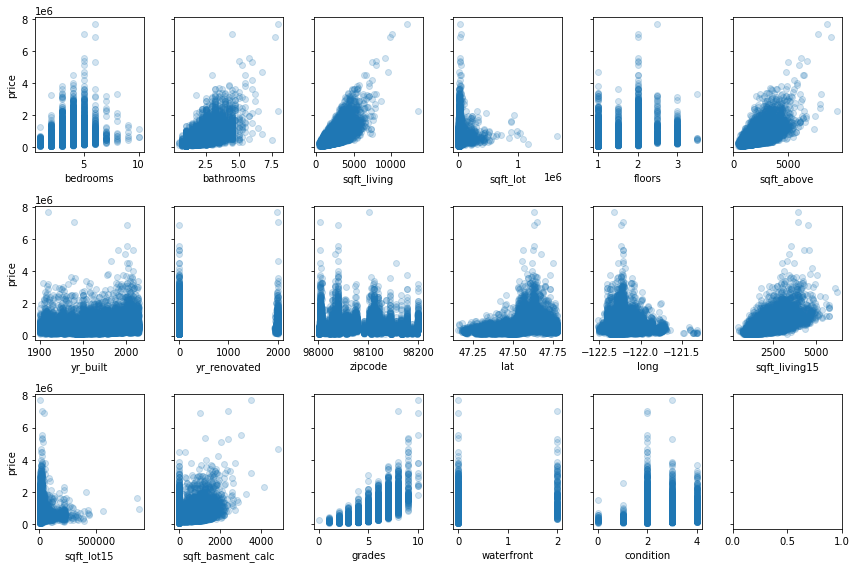

In [16]:
y_plots = df["price"]
x_plots = df.drop("price", axis=1)

fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(12,8), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("price")

fig.tight_layout()

Based on scatterplots we are looking at features to transform

Potential features: 
- sqft_livin
- sqft_lot
- bathrooms
- bedrooms 
- year built

Compared the mean price for each build grade, noticed that the relationship looked exponetial. Decided to log transform the feature to see if the relationship was linear, upon initial inspection it appears that the transformed feature does have a linear relationship with price.

In [17]:
mean_grade = df.groupby('grades')['price'].mean()

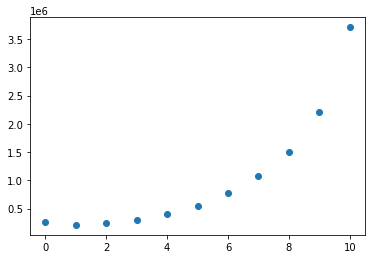

In [18]:
fig, ax = plt.subplots()

ax.scatter(x = mean_grade.index, y = mean_grade)

In [19]:
mean_price_log = np.log(mean_grade)


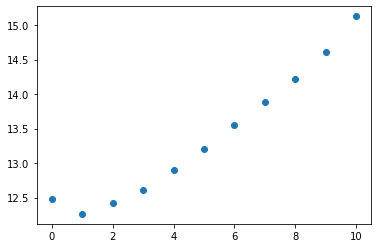

In [20]:
fig, ax = plt.subplots()

ax.scatter(x = mean_grade.index, y = mean_price_log)

We then explored the histograms of key features. 

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

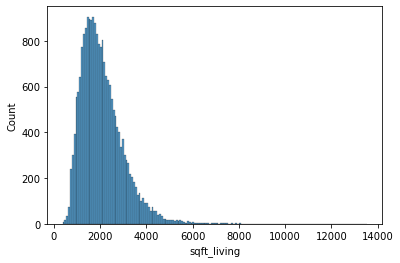

In [21]:
sns.histplot(df['sqft_living'])

In [22]:
y_log = np.log(df['price'])
x_log_sqftliving = np.log(df['sqft_living'])

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

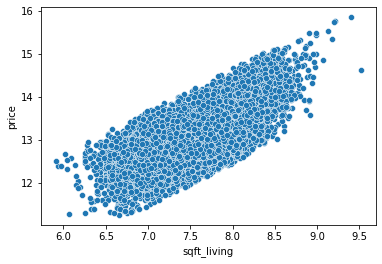

In [23]:
sns.scatterplot(x = x_log_sqftliving, y = y_log)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

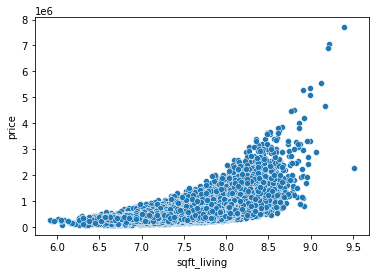

In [24]:
sns.scatterplot(x = x_log_sqftliving, y = y)

It appears that there is a more linear relationship present when both x and y are log transfomred. 

In [25]:
# x_log_sqftlot = np.log(df['sqft_lot'])
# sns.scatterplot(x = x_log_sqftlot, y = y_log)
# # not helpful

In [26]:
# x_log_year = np.log(df['yr_built'])
# sns.scatterplot(x = x_log_year, y = y_log)
# #not helpful

/Users/ashlidougherty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='grades', ylabel='price'>

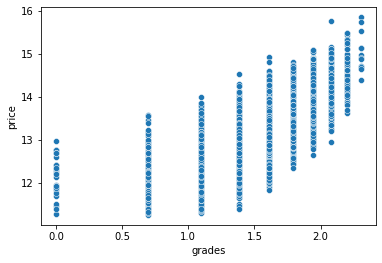

In [27]:
x_log_grades = np.log(df['grades'])
sns.scatterplot(x = x_log_grades, y = y_log)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

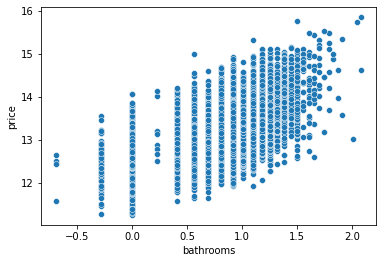

In [28]:
x_log_bathroom = np.log(df['bathrooms'])
sns.scatterplot(x = x_log_bathroom, y = y_log)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

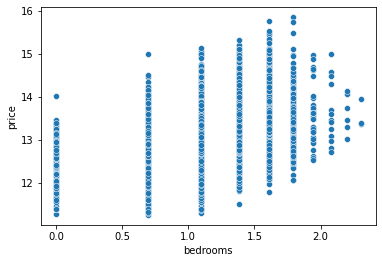

In [29]:
x_log_bedroom = np.log(df['bedrooms'])
sns.scatterplot(x = x_log_bedroom, y = y_log)

### Feature transfrom conclusions
***
Taking the log of identified features did not appear to increase the performance of the model. These transformed features will not be included in the final model.

***

## Exploration of interactions

Due to a high correlation we decided to try an interaction between grades and sqft_living. 

We multiplied grades by sqft_living and ran the regression model again with the product column included and the individual grades and sqft_living columns excluded. 

In [30]:
df['grades*sqftliving'] = df['grades'] * df['sqft_living']
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition,grades*sqftliving
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,4.0,0.0,2.0,4720.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,4.0,0.0,2.0,10280.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0,3.0,0.0,2.0,2310.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910,4.0,0.0,4.0,7840.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0,5.0,0.0,2.0,8400.0


In [31]:
X_interactions = df.drop(columns=['price', 'sqft_above', 'zipcode',
                                  'floors', 'grades', 'sqft_living'], axis = 1)
interactions_results = sm.OLS(y, sm.add_constant(X_interactions)).fit()
interactions_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     4338.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:25:24   Log-Likelihood:            -2.9349e+05
No. Observations:               21595   AIC:                         5.870e+05
Df Residuals:                   21581   BIC:                         5.871e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -4.33e+07   1.46e+06    -29.682      0.000   -4.62e+07   -4.04e+07
bedrooms          -2.959e+04   1802.531    -16.416      0.000   -3.31e+04   -2.61e+04
bathrooms          4.197e+04   2935.027     14.300      0.000    3.62e+04    4.77e+04
sqft_lot              0.1058      0.046      2.299      0.022       0.016       0.196
yr_built          -1975.1932     64.730    -30.514      0.000   -2102.069   -1848.318
yr_renovated         39.1926      3.813     10.278      0.000      31.718      46.667
lat                5.721e+05   9861.361     58.017      0.000    5.53e+05    5.91e+05
long              -1.637e+05   1.11e+04    -14.711      0.000   -1.85e+05   -1.42e+05
sqft_living15        34.2549      3.103     11.039      0.000      28.173      40.337
sqft_lot15           -0.4520      0.070     -6.425      0.000      -0.590      -0.314
sqft_basment_calc   -21.1799      3.465     -6.112      0.000     -27.972     -14.387
waterfront         3.639e+05   8156.319     44.618      0.000    3.48e+05     3.8e+05
condition          3.822e+04   2234.944     17.100      0.000    3.38e+04    4.26e+04
grades*sqftliving    35.9220      0.336    107.019      0.000      35.264      36.580
==============================================================================
Omnibus:                    12472.664   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           449185.816
Skew:                           2.182   Prob(JB):                         0.00
Kurtosis:                      24.913   Cond. No.                     5.64e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Our R2 value increased to .723. 
- Still has a high cond no at 5.6 x 10^7

Next we calculated the mean absolute error and root means squared error. 

In [32]:
interactions_results.resid

0        -48156.857518
1       -203146.714390
2       -248945.035095
3        101446.254826
4         88091.170465
             ...      
21590   -101690.379254
21591    -65234.103554
21592    197890.904639
21593     59362.815958
21594    118721.547701
Length: 21595, dtype: float64

<AxesSubplot:ylabel='Count'>

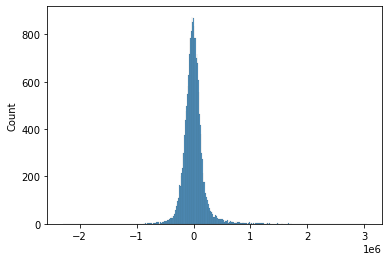

In [33]:
sns.histplot(interactions_results.resid)

In [34]:
mae = interactions_results.resid.abs().sum() / len(y)
mae

122620.90837280563

In [35]:
rmse = ((interactions_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

193277.0523274865

We examined our errors by creating a QQ plot.

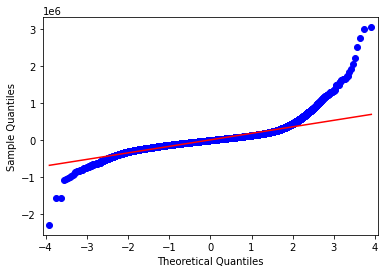

In [36]:
sm.qqplot(interactions_results.resid, line="r");

Based on the histrogram this QQ plot looks like expected. The high end outliers account for some of the errors. 

### final sm model without interaction

In [37]:
X_grade_living = df.drop(columns=['price', 'sqft_above', 'zipcode',
                                  'floors', 'sqft_lot', 'grades*sqftliving'], axis = 1)
X_grade_living_results = sm.OLS(y, sm.add_constant(X_grade_living)).fit()
X_grade_living_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     3665.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:25:25   Log-Likelihood:            -2.9478e+05
No. Observations:               21595   AIC:                         5.896e+05
Df Residuals:                   21581   BIC:                         5.897e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -3.84e+07   1.58e+06    -24.253      0.000   -4.15e+07   -3.53e+07
bedrooms           -4.17e+04   2011.603    -20.730      0.000   -4.56e+04   -3.78e+04
bathrooms          4.633e+04   3210.653     14.430      0.000       4e+04    5.26e+04
sqft_living         181.4229      3.708     48.926      0.000     174.155     188.691
yr_built          -2648.9385     70.814    -37.407      0.000   -2787.739   -2510.138
yr_renovated         26.9540      4.051      6.654      0.000      19.014      34.894
lat                5.391e+05   1.06e+04     50.924      0.000    5.18e+05     5.6e+05
long              -1.437e+05    1.2e+04    -12.023      0.000   -1.67e+05    -1.2e+05
sqft_living15        38.5825      3.431     11.245      0.000      31.857      45.308
sqft_lot15           -0.2276      0.054     -4.206      0.000      -0.334      -0.122
sqft_basment_calc   -18.6279      3.928     -4.743      0.000     -26.326     -10.930
grades              1.02e+05   2186.868     46.654      0.000    9.77e+04    1.06e+05
waterfront         3.859e+05   8647.759     44.626      0.000    3.69e+05    4.03e+05
condition          3.125e+04   2371.126     13.178      0.000    2.66e+04    3.59e+04
==============================================================================
Omnibus:                    18158.592   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1674741.875
Skew:                           3.531   Prob(JB):                         0.00
Kurtosis:                      45.560   Cond. No.                     3.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R2 value is .688 (which is lower than the LR model with the interaction)
- pvalues for all coefficients are significant. 
- condition number is the less than interaction model at 3.4 x 10^7

Next we calculated the mean absolute error and root means squared error. 

<AxesSubplot:ylabel='Count'>

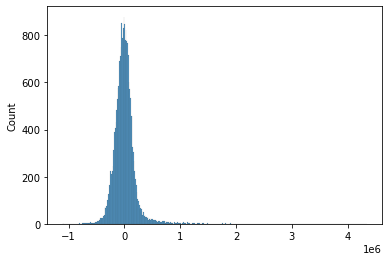

In [38]:
sns.histplot(X_grade_living_results.resid)


In [39]:
X_grade_living_results.resid

0        -36175.231918
1       -222029.581568
2       -173094.710699
3        108767.738502
4         53839.994148
             ...      
21590   -112508.853324
21591    -69985.295840
21592    246609.657197
21593     34769.848020
21594    166873.474457
Length: 21595, dtype: float64

In [40]:
mae2 = X_grade_living_results.resid.abs().sum() / len(y)
mae2

129071.8203775708

In [41]:
rmse2 = ((X_grade_living_results.resid ** 2).sum() / len(y)) ** 0.5
rmse2

205117.2645107271

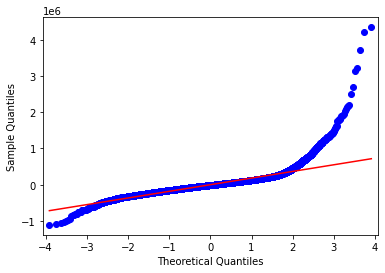

In [42]:
sm.qqplot(X_grade_living_results.resid, line="r");

Based on the histrogram this QQ plot looks like expected. The high end outliers account for some of the errors. 
***
Source for qqplot interpretation: 
https://math.illinois.edu/system/files/inline-files/Proj9AY1516-report2.pdf

## Additional Models

### Using dummy columns

In [43]:
X_interaction_test = df.loc[:, ['sqft_living','grades']]
X_interaction_test
X_interaction_test1 = pd.get_dummies(X_interaction_test, columns=['grades'], drop_first=True)
X_interaction_test1


,sqft_living,grades_1.0,grades_2.0,grades_3.0,grades_4.0,grades_5.0,grades_6.0,grades_7.0,grades_8.0,grades_9.0,grades_10.0
0,1180,0,0,0,1,0,0,0,0,0,0
1,2570,0,0,0,1,0,0,0,0,0,0
2,770,0,0,1,0,0,0,0,0,0,0
3,1960,0,0,0,1,0,0,0,0,0,0
4,1680,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21590,1530,0,0,0,0,1,0,0,0,0,0
21591,2310,0,0,0,0,1,0,0,0,0,0
21592,1020,0,0,0,1,0,0,0,0,0,0
21593,1600,0,0,0,0,1,0,0,0,0,0


In [44]:
X_interaction2 = X_interaction_test1.copy()
X_interaction2["sqft_living x grades"] = X_interaction_test1["sqft_living"] * X_interaction_test1["grades_1.0"]
X_interaction2


,sqft_living,grades_1.0,grades_2.0,grades_3.0,grades_4.0,grades_5.0,grades_6.0,grades_7.0,grades_8.0,grades_9.0,grades_10.0,sqft_living x grades
0,1180,0,0,0,1,0,0,0,0,0,0,0
1,2570,0,0,0,1,0,0,0,0,0,0,0
2,770,0,0,1,0,0,0,0,0,0,0,0
3,1960,0,0,0,1,0,0,0,0,0,0,0
4,1680,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21590,1530,0,0,0,0,1,0,0,0,0,0,0
21591,2310,0,0,0,0,1,0,0,0,0,0,0
21592,1020,0,0,0,1,0,0,0,0,0,0,0
21593,1600,0,0,0,0,1,0,0,0,0,0,0


In [45]:
interaction_model = sm.OLS(y, sm.add_constant(X_interaction2)).fit()
interaction_results = interaction_model.summary()
interaction_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2503.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:25:26   Log-Likelihood:            -2.9795e+05
No. Observations:               21595   AIC:                         5.959e+05
Df Residuals:                   21582   BIC:                         5.960e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.802e+05   2.38e+05      0.758      0.448   -2.86e+05    6.46e+05
sqft_living            157.3000      2.784     56.507      0.000     151.844     162.756
grades_1.0            4.997e+04    2.8e+05      0.178      0.858   -4.99e+05    5.99e+05
grades_2.0           -8.636e+04   2.38e+05     -0.363      0.717   -5.53e+05     3.8e+05
grades_3.0           -6.572e+04   2.38e+05     -0.276      0.782   -5.32e+05       4e+05
grades_4.0           -4.339e+04   2.38e+05     -0.183      0.855   -5.09e+05    4.22e+05
grades_5.0            1.911e+04   2.38e+05      0.080      0.936   -4.47e+05    4.85e+05
grades_6.0            1.424e+05   2.38e+05      0.599      0.549   -3.24e+05    6.08e+05
grades_7.0            3.384e+05   2.38e+05      1.423      0.155   -1.28e+05    8.05e+05
grades_8.0            6.262e+05   2.38e+05      2.629      0.009    1.59e+05    1.09e+06
grades_9.0             1.16e+06   2.39e+05      4.848      0.000    6.91e+05    1.63e+06
grades_10.0           2.353e+06   2.47e+05      9.514      0.000    1.87e+06    2.84e+06
sqft_living x grades  -183.9972    207.401     -0.887      0.375    -590.519     222.525
==============================================================================
Omnibus:                    13858.789   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           473084.630
Skew:                           2.575   Prob(JB):                         0.00
Kurtosis:                      25.344   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***

### Map of house location and price

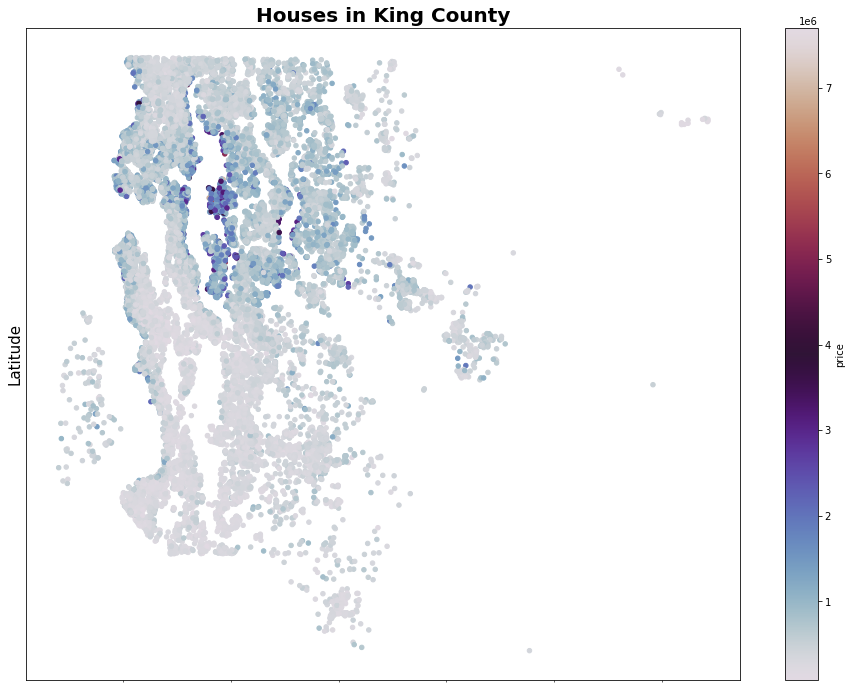

In [46]:
df.plot(kind = 'scatter', x='long', y='lat', figsize=(16,12), 
        c= 'price', cmap = 'twilight')
plt.title('Houses in King County', fontsize =20, weight = 'bold')
plt.ylabel('Latitude', fontsize =15)
plt.xlabel('Longitude', fontsize =15)

plt.xticks([])
plt.yticks([]);